In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creating a DTS_recording class to speed up creating multiple recording

In [17]:
class DTS_recording:
    def __init__(self,frame_by_frame_distance_array,frames_per_second):
        self.frame_by_frame_distance_array = [abs(i - frame_by_frame_distance_array[0]) for i in frame_by_frame_distance_array]        
        self.frames_per_second = frames_per_second
        self.constant_time_array = [i/self.frames_per_second for i in range(len(self.frame_by_frame_distance_array))]
        self.change_in_frame_by_frame_distance_array = np.diff(self.frame_by_frame_distance_array)
        self.velocities = self.change_in_frame_by_frame_distance_array * self.frames_per_second / 1000
        self.median_velocity = np.median(self.velocities)
    
    
    def rolling_average(self):
        data_array = np.array(self.change_in_frame_by_frame_distance_array)
        moving_avg = np.convolve(data_array, np.ones(5)/5, mode='valid')
        return moving_avg
        
    def plot(self):
        plt.figure(figsize=(18,10))
        sns.set_style('darkgrid')

        plt.subplot(2,1,1)
        plt.scatter(self.frame_by_frame_distance_array,self.constant_time_array)
        plt.title("Relationship between Distance Traveled (mm) and Time elapsed (s) for the DTS system at {velocity} m/s".format(velocity = self.median_velocity ))
        plt.ylabel("Time (s)")
        plt.xlabel("Distance traveled (mm)")

        plt.subplot(2,1,2)   
        plt.scatter(self.frame_by_frame_distance_array[:-1],self.velocities)     
        plt.title("Relationship between Distance Traveled (mm) and the corresponding velocity in m/s for the DTS system at {velocity} m/s".format(velocity = self.median_velocity))
        plt.xlabel("Distance traveled (mm)")
        plt.ylabel("Velocity (mm/frame)")

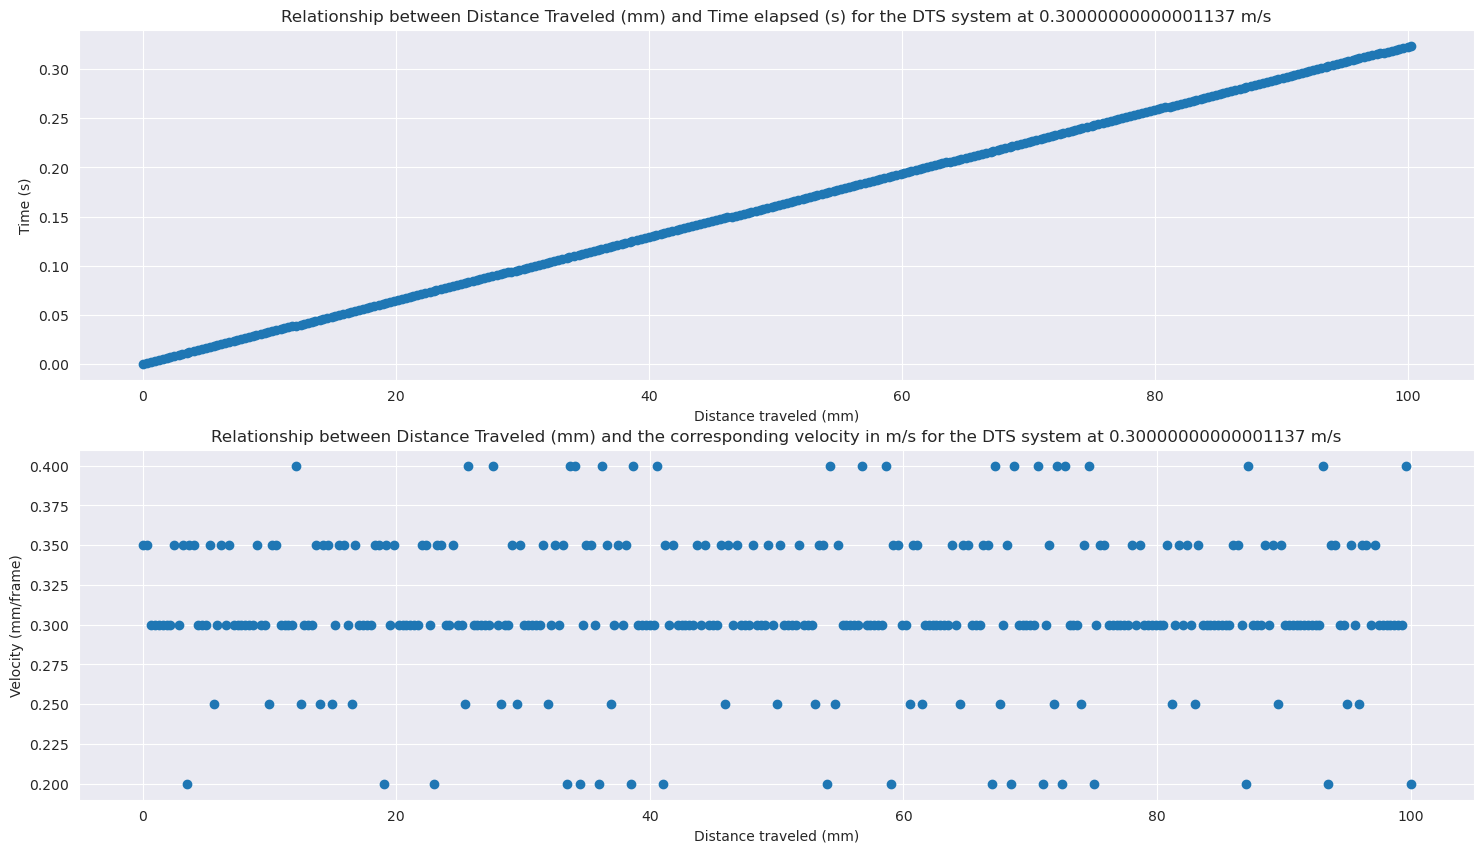

In [18]:
C0487_frame_by_frame_distance_array = [
    149.9,149.6,149.3,149,148.6,148.3,148,147.7,147.3,147,146.7,146.4,146.1,145.8,145.5,145.2,
    144.9,144.5,144.2,143.9,143.6,143.25,143,142.75,142.45,142.1,141.8,141.45,141.1,140.9,140.6,140.2,
    139.9,139.6,139.25,138.95,138.6,138.3,137.95,137.65,137.3,137,136.7,136.4,136.05,135.8,135.5,135.1,
    134.9,134.6,134.2,133.9,133.6,133.3,133,132.65,132.3,132.1,131.85,131.45,131.1,130.9,130.55,130.2, #readings cut out
    129.9,129.5,129.1,128.9,128.6,128.2,128,127.6,127.3,127,126.6,126.3,126.05,125.7,125.4,125.1,
    124.8,124.5,124.1,123.9,123.6,123.2,122.9,122.6,122.3,122,121.7,121.4,121.1,120.9,120.6,120.2,
    119.9,119.6,119.2,119.0,118.6,118.3,118,117.65,117.4,117.1,116.7,116.4,116.1,115.9,115.55,115.2,
    114.9,114.6,114.25,113.95,113.65,113.3,113,112.7,112.4,112.1,111.75,111.45,#readings cut out
    111.1,110.8,110.45,110.1,109.9,109.6,109.2,109,108.6,108.2,108,107.6,107.4,107.1,106.75,106.45,106.1,105.9,105.6,105.1,
    104.9,104.6,104,103.6,103.2,103,102.7,102.1,101.7,102.4,102.1,100.9,100.2,
    99.9, 99.6,99.2,98.7,98.5,98.1,97.7,97.5,97,96.5,96.2,95.9,95.5,95,
    94.6,94.2,94,93.6,93,92.6,92.3
]

C0494_frame_by_frame_distance_array = [
    150.1,149.75,149.4,149.1,148.8,148.5,148.2,147.9,147.6,147.25,146.95,146.6,146.4,146.05,145.7,145.4,145.1,
    144.8,144.45,144.2,143.9,143.55,143.25,142.9,142.6,142.3,142,141.7,141.4,141.1,140.75,140.45,140.15,
    139.9,139.55,139.2,138.9,138.6,138.3,138,137.6,137.35,137.05,136.75,136.45,136.1,135.85,135.5,135.15,
    134.9,134.6,134.25,133.9,133.6,133.35,133,132.7,132.4,132.1,131.8,131.45,131.1,130.9,130.55,130.25,
    129.9,129.6,129.3,129,128.7,128.4,128.1,127.75,127.4,127.1,126.9,126.55,126.2,125.9,125.6,125.25,
    124.95,124.65,124.4,124,123.7,123.4,123.1,122.8,122.5,122.1,121.8,121.55,121.25,120.95,120.6,120.35,120,
    119.7,119.4,119.1,118.8,118.5,118.15,117.9,117.6,117.25,116.95,116.6,116.4,116,115.6,115.4,115.1,
    114.75,114.4,114.1,113.9,113.5,113.15,112.9,112.6,112.25,111.95,111.6,111.4,111,110.7,110.4,110.1,
    109.8,109.5,109.1,108.9,108.55,108.25,107.9,107.6,107.3,107,106.7,106.4,106.05,105.75,105.4,105.1,
    104.8,104.5,104.15,103.9,103.55,103.25,102.9,102.6,102.3,102,101.65,101.35,101.05,100.75,100.4,100.1,
    99.85,99.5,99.2,98.9,98.6,98.3,97.95,97.65,97.35,97.05,96.8,96.45,96.1,95.9,95.5,95.25,
    94.9,94.6,94.3,94,93.7,93.4,93,92.7,92.4,92.1,91.8,91.5,91.1,90.9,90.55,90.2,
    89.9,89.6,89.35,89,88.65,88.4,88.1,87.8,87.5,87.2,86.9,86.6,86.3,85.95,85.65,85.4,85.05,
    84.7,84.4,84.1,83.8,83.45,83.1,82.9,82.5,82.25,81.95,81.6,81.4,81,80.7,80.4,80.1,
    79.8,79.5,79.1,78.9,78.6,78.25,78,77.6,77.4,77,76.7,76.4,76.1,75.85,75.5,75.1,
    74.9,74.6,74.25,73.9,73.6,73.3,73,72.7,72.4,72.1,71.75,71.45,71.1,70.8,70.5,70.2,
    69.9,69.6,69.3,68.95,68.7,68.4,68.05,67.75,67.4,67.1,66.85,66.5,66.2,65.9,65.6,65.3,65,
    64.7,64.4,64.1,63.75,63.4,63.1,62.9,62.5,62.2,61.9,61.6,61.25,60.95,60.6,60.35,60,
    59.7,59.4,59.1,58.8,58.5,58.2,57.9,57.6,57.3,57,56.6,56.4,56.05,55.7,55.4,55.1,
    54.85,54.5,54.2,53.95,53.6,53.25,52.95,52.6,52.3,52,51.7,51.4,51.1,50.8,50.5,50.1,49.9
]
for i in range(len(C0494_frame_by_frame_distance_array) - 1):
    if C0494_frame_by_frame_distance_array[i + 1] - C0494_frame_by_frame_distance_array[i] > 0:
        print(C0494_frame_by_frame_distance_array[i])


C0487 = DTS_recording(C0487_frame_by_frame_distance_array,1000)
C0494 = DTS_recording(C0494_frame_by_frame_distance_array,1000)

#Watch for jitter at around 150mm where the paper clip is
#C0487.plot()
C0494.plot()


Text(0.5, 1.0, 'Histogram detailing distribrution of velocities along a 50mm stroke length')

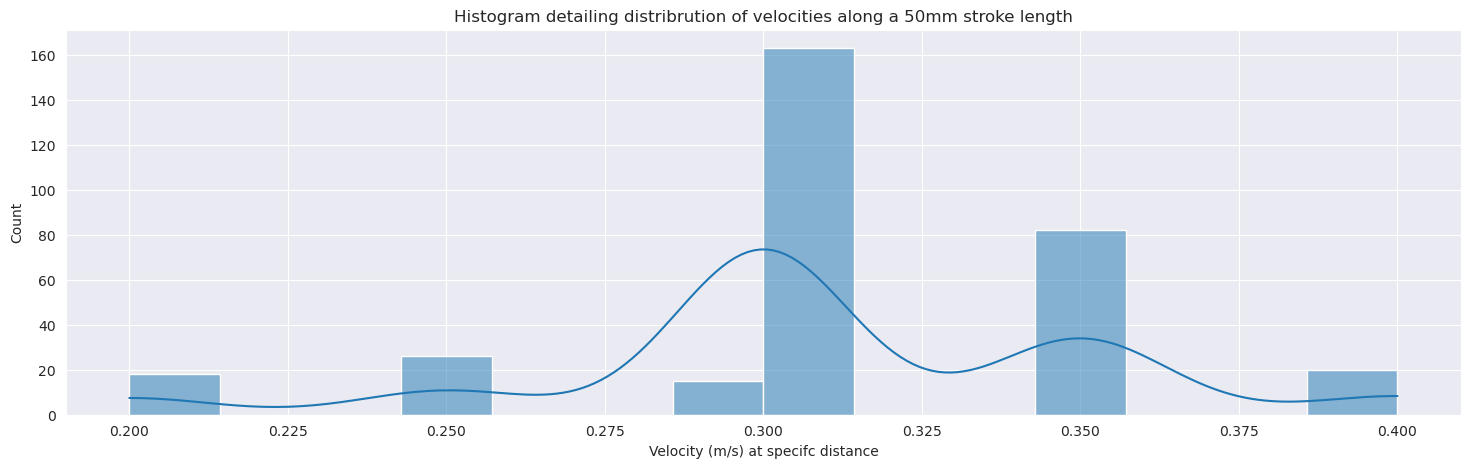

In [19]:
plt.figure(figsize=(18,5))
sns.histplot(C0494.velocities,kde=True)
plt.xlabel("Velocity (m/s) at specifc distance")
plt.title("Histogram detailing distribrution of velocities along a 50mm stroke length")

In [20]:
def plot_10_cycles(distance_data):
    data_in_order = [abs(i - distance_data[0]) for i in distance_data]   
    cycle1 = []
    cycle2 = []
    cycle3 = []
    cycle4 = []
    cycle5 = []
    cycle6 = []
    cycle7 = []
    cycle8 = []
    cycle9 = []
    cycle10 = []

    for i in data_in_order:
        if i < 10:
            cycle1.append(i)
        elif i < 20:
            cycle2.append(i)
        elif i < 30:
            cycle3.append(i)
        elif i < 40:
            cycle4.append(i)
        elif i < 50:
            cycle5.append(i)
        elif i < 60:
            cycle6.append(i)
        elif i < 70:
            cycle7.append(i)
        elif i < 80:
            cycle8.append(i)
        elif i < 90:
            cycle9.append(i)
        elif i < 100:
            cycle10.append(i)
        else:
            pass
        
    return [cycle1, cycle2, cycle3, cycle4, cycle5, cycle6, cycle7, cycle8, cycle9, cycle10]


def zero_cycle(cycle):
    return [i - cycle[0] for i in cycle]

velocity graph of all cycles overlayed

Text(0.5, 0, 'distance (mm)')

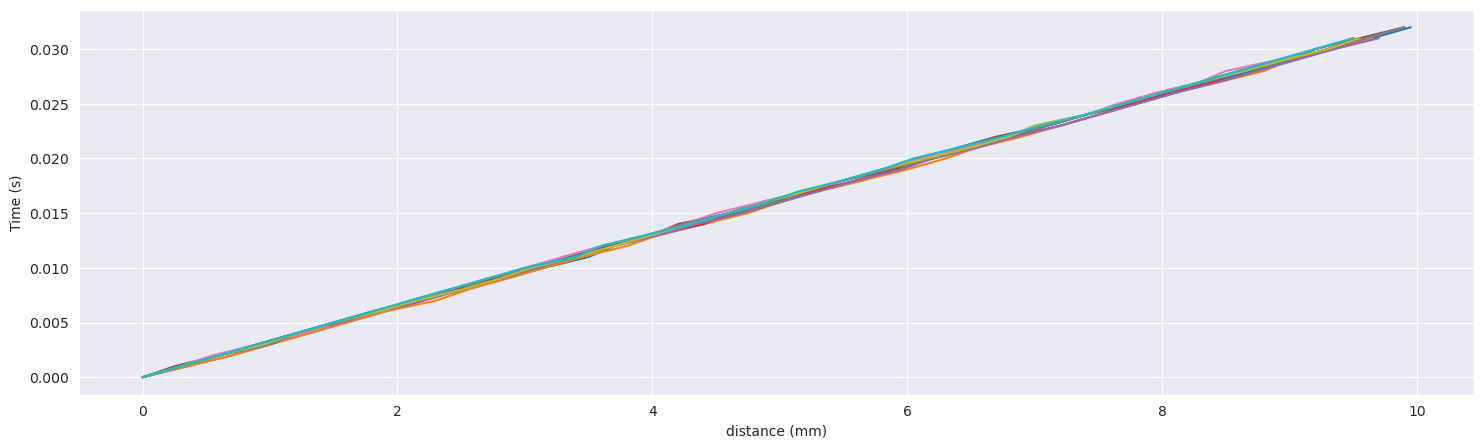

In [23]:
cycles = plot_10_cycles(C0494_frame_by_frame_distance_array)
zeroed_cycles = [zero_cycle(cycle) for cycle in cycles]

plt.figure(figsize = (18,5))
for i in range(10):
    plt.plot(zeroed_cycles[i],[i/1000 for i in range(len(zeroed_cycles[i]))])
    
plt.ylabel("Time (s)")
plt.xlabel("distance (mm)")


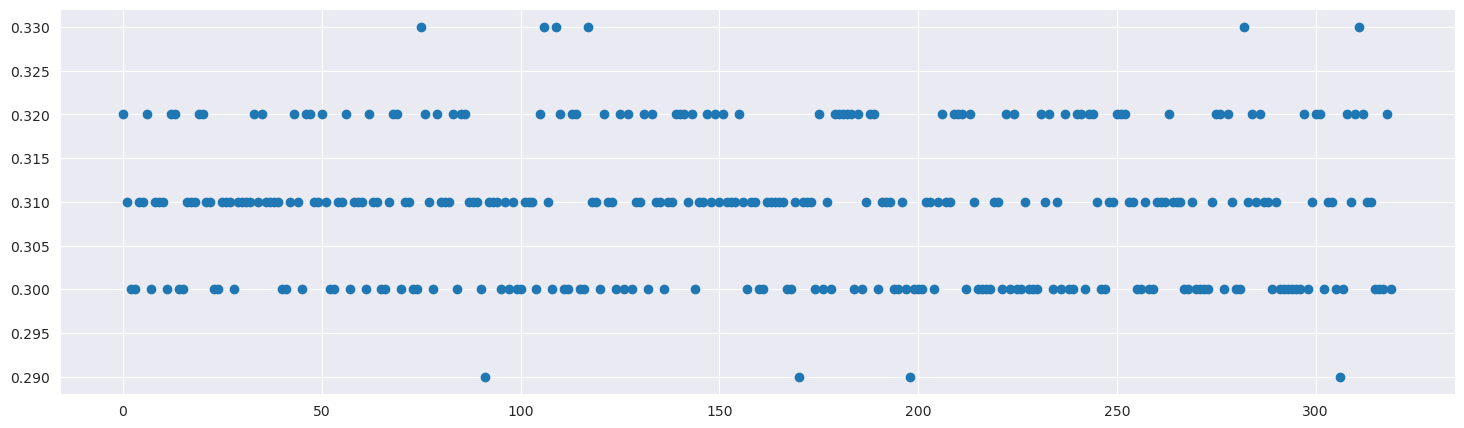

In [22]:
plt.figure(figsize = (18,5))
list = C0494.rolling_average()
plt.scatter(range(len(list)),list)
